#### Aprendizaje Profundo - 2do Examen Parcial 
*Daniel Agraz Vallejo*

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 1. **[80%]** Implementar una red neuronal profunda (DNN) para clasificar el conjunto de datos de flores Iris. 

El conjunto de datos Iris contiene la longitud y el ancho del sépalo y pétalo (4 características) de 150 flores (instancias) de tres especies diferentes: Setosa, Versicolor y Virginica.  

a. Utilizar el modelo secuencial `tf.keras.Sequential()`.
  
b. Definir claramente las diferentes fases: carga y distribución del conjunto de datos, creación del modelo, compilación, entrenamiento y evaluación del modelo, desplegar la arquitectura final con el método `summary()`.  

c. Graficar las curvas de aprendizaje, considerando la información de la pérdida y la precisión que se calcularon al final de cada época en el conjunto de entrenamiento y en el conjunto de validación.  

d. Realizar la evaluación de su modelo empleando el método evaluate().  

e. Realizar pruebas del modelo ajustado, deberá desplegar el ejemplo, la etiqueta real, la predicción

#### **b. Fases del Modelo**

##### 1) Carga y Distribución del Conjunto de Datos

In [53]:
iris = datasets.load_iris()
X = iris.data[:,:]
y = np.reshape(iris.target, newshape=(-1,1))

In [10]:
print(f"X SHAPE: {X.shape}\ny SHAPE: {y.shape}")

X SHAPE: (150, 4)
y SHAPE: (150, 1)


In [54]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, random_state=42)
print(f"X_train_full: {X_train_full.shape} | y_train_full: {y_train_full.shape}")
print(f"X_test: {X_test.shape} | y_test: {y_test.shape}")

X_train_full: (112, 4) | y_train_full: (112, 1)
X_test: (38, 4) | y_test: (38, 1)


In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)
print(f"X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"X_valid: {X_valid.shape} | y_valid: {y_valid.shape}")

X_train: (84, 4) | y_train: (84, 1)
X_valid: (28, 4) | y_valid: (28, 1)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

In [56]:
X_train[0,:], y_train[0]

(array([5.2, 2.7, 3.9, 1.4]), array([1]))

**Label Encoder for DNN Output**

In [57]:
encoder =  LabelEncoder()
y_train_hot = encoder.fit_transform(np.ravel(y_train))
y_valid_hot = encoder.transform(np.ravel(y_valid))
y_test_hot = encoder.transform(np.ravel(y_test))
y_train_hot

array([1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1,
       0, 1, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0,
       1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1])

In [58]:
y_train = pd.get_dummies(y_train_hot).values
y_valid = pd.get_dummies(y_valid_hot).values
y_test = pd.get_dummies(y_test_hot).values
y_train

array([[False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [Fa

##### 2) Creación del Modelo

In [9]:
tf.keras.backend.clear_session()

**a. Utilizar el modelo Sequential de Tensorflow**

In [14]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(3, activation="softmax")
])
model.build((None,4))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               500       
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 803 (3.14 KB)
Trainable params: 803 (3.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### 3) Compilación de Modelo

In [61]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [62]:
history = model.fit(X_train, y_train, epochs=100,
                    batch_size=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
2/2 [==============================] - 0s 145ms/step - loss: 0.5162 - accuracy: 0.9167 - val_loss: 0.5590 - val_accuracy: 0.9643
Epoch 2/100
2/2 [==============================] - 0s 37ms/step - loss: 0.5273 - accuracy: 0.8095 - val_loss: 0.5501 - val_accuracy: 0.9643
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 0.5138 - accuracy: 0.9643 - val_loss: 0.5494 - val_accuracy: 0.9643
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 0.5068 - accuracy: 0.9524 - val_loss: 0.5497 - val_accuracy: 0.9643
Epoch 5/100
2/2 [==============================] - 0s 40ms/step - loss: 0.5028 - accuracy: 0.9524 - val_loss: 0.5492 - val_accuracy: 0.9286
Epoch 6/100
2/2 [==============================] - 0s 36ms/step - loss: 0.4997 - accuracy: 0.9048 - val_loss: 0.5474 - val_accuracy: 0.8929
Epoch 7/100
2/2 [==============================] - 0s 38ms/step - loss: 0.4964 - accuracy: 0.8810 - val_loss: 0.5443 - val_accuracy: 0.8929
Epoch 8/100
2/2 [==

##### 4) Entrenamiento y Evaluación del Modelo

In [63]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 211ms/step - loss: 0.3137 - accuracy: 0.9737


[0.3136843740940094, 0.9736841917037964]

In [64]:
miniX_test = X_test[:3]
y_pred = model.predict(miniX_test)

1/1 [==============================] - 0s 251ms/step


In [65]:
y_pred = np.argmax(model.predict(miniX_test), axis=1)
y_pred

1/1 [==============================] - 0s 17ms/step


array([1, 0, 2])

array([[False,  True, False],
       [ True, False, False],
       [False, False,  True]])

#### **c. Gráficar Curvas de Aprendizaje**

In [68]:
learning_curves = pd.DataFrame(history.history)
learning_curves

,loss,accuracy,val_loss,val_accuracy
0,0.516194,0.916667,0.559007,0.964286
1,0.527316,0.809524,0.550129,0.964286
2,0.513783,0.964286,0.549392,0.964286
3,0.506757,0.952381,0.549697,0.964286
4,0.502776,0.952381,0.549238,0.928571
...,...,...,...,...
95,0.349432,0.964286,0.378750,0.964286
96,0.350078,0.964286,0.380738,0.964286
97,0.347179,0.952381,0.376071,0.964286
98,0.345851,0.952381,0.373230,0.964286


<Axes: >

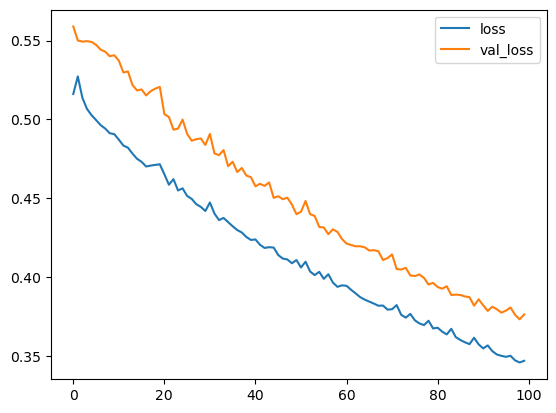

In [75]:
learning_curves[['loss', 'val_loss']].plot()

<Axes: >

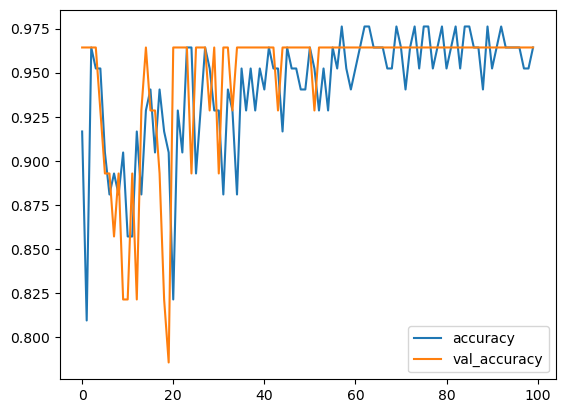

In [76]:
learning_curves[['accuracy', 'val_accuracy']].plot()

#### **d. Realizar evaluación del modelo**

In [77]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 25ms/step - loss: 0.3137 - accuracy: 0.9737


[0.3136843740940094, 0.9736841917037964]

#### **e. Realizar pruebas del modelo ajustado**

In [78]:
miniX_test = X_test[:3]
y_pred = model.predict(miniX_test)

1/1 [==============================] - 0s 18ms/step


In [79]:
y_pred = np.argmax(model.predict(miniX_test), axis=1)
y_pred

1/1 [==============================] - 0s 14ms/step


array([1, 0, 2])

In [81]:
y_test[:3].astype(int)

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

### 2.**[10%]** Suponga que tiene un MLP compuesto por una capa de entrada con 10 neuronas de paso, seguida de una capa oculta con 50 neuronas artificiales y, finalmente, una capa de salida con 3 neuronas artificiales. Todas las neuronas artificiales utilizan la función de activación ReLU.
 

**a**. ¿Cuál es la forma de la matriz de entrada $X$ ? 

Dimensiones $X - (10 \times 1)$

**b.** ¿Cuáles son las dimensiones del vector de peso $W_{h}$ de la capa oculta y su vector de sesgo $b_{h}$ ?

Dimensiones $W_{h} - (50 \times 10)$  
Dimensiones $b_{h} - (50 \times 1)$

**c.** ¿Cuáles son las formas del vector de peso $W_{0}$ de la capa de salida y su vector de sesgo $b_{0}$ ?

Dimensiones $W_{0} - (1 \times 50)$  
Dimensiones $b_{0} - (1 \times 1)$

**d.** ¿Cuál es la forma de la matriz de salida $Y$ de la red?  

Dimensiones $Y$ - $(3 \times 1)$

**e.** Escriba la ecuación que calcula la matriz de salida 𝐘 de la red en función de $X$ , $W_{h}$ , $b_{h}$ , $W_{0}$ y $b_{0}$ .

$Y = relu(X \cdot W_{h}^{T} + b_{h})$

### 3. **[10%]** ¿Cuántas neuronas se necesitan en la capa de salida y que función de activación se debe emplear para los siguientes casos?:

**a.** Clasificar el correo electrónico como spam o ham. 

**Neuronas en Capa de Salida:**  1  
**Función de Activación:**  $\sigma$

**b.** Clasificar dígitos escritos a mano del conjunto de datos MNIST.  

**Neuronas en Capa de Salida:**  10  
**Función de Activación:**  $softmax()$

c. Realizar la predicción del precio de venta de una vivienda.

**Neuronas en Capa de Salida:**  1  
**Función de Activación:**  $relu()\;,\;tanh()$